## Plot Results of Solving Ising Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [3]:
def read_eigenvalues(filename):
    with open(filename) as f:
        data = f.readlines()
    return [float(ev) for ev in data[1].split()]

In [4]:
program = f"{compiled_dir}{os.sep}ising_model"

In [5]:
N = range(3, 13)
print(list(N))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [6]:
lam = np.arange(0, 3.1, 0.1)
print(lam)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


In [7]:
num_eig = 8

In [8]:
energy_eigenvalues = np.zeros((len(N), len(lam), num_eig))

In [9]:
for idx1, n in enumerate(N):
    print(f"Processing N = {n} ...")
    for idx2, lm in enumerate(lam):
        output_filename = f"{data_dir}{os.sep}ising_N{n}_lam{lm:.2f}.txt"
        output = subprocess.run(
            [program, "--N", str(n), "--lambda", str(lm), "--output_filename", output_filename],
            stdout=subprocess.PIPE
        )
        E = read_eigenvalues(output_filename)
        energy_eigenvalues[idx1, idx2] = E[:num_eig]

Processing N = 3 ...
Processing N = 4 ...
Processing N = 5 ...
Processing N = 6 ...
Processing N = 7 ...
Processing N = 8 ...
Processing N = 9 ...
Processing N = 10 ...
Processing N = 11 ...
Processing N = 12 ...


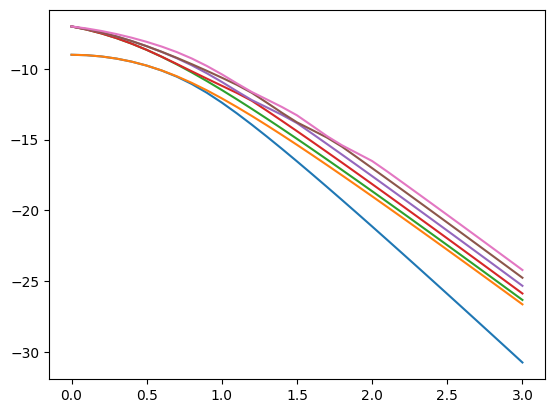

In [10]:
plt.plot(lam, energy_eigenvalues[7, :, :7]);